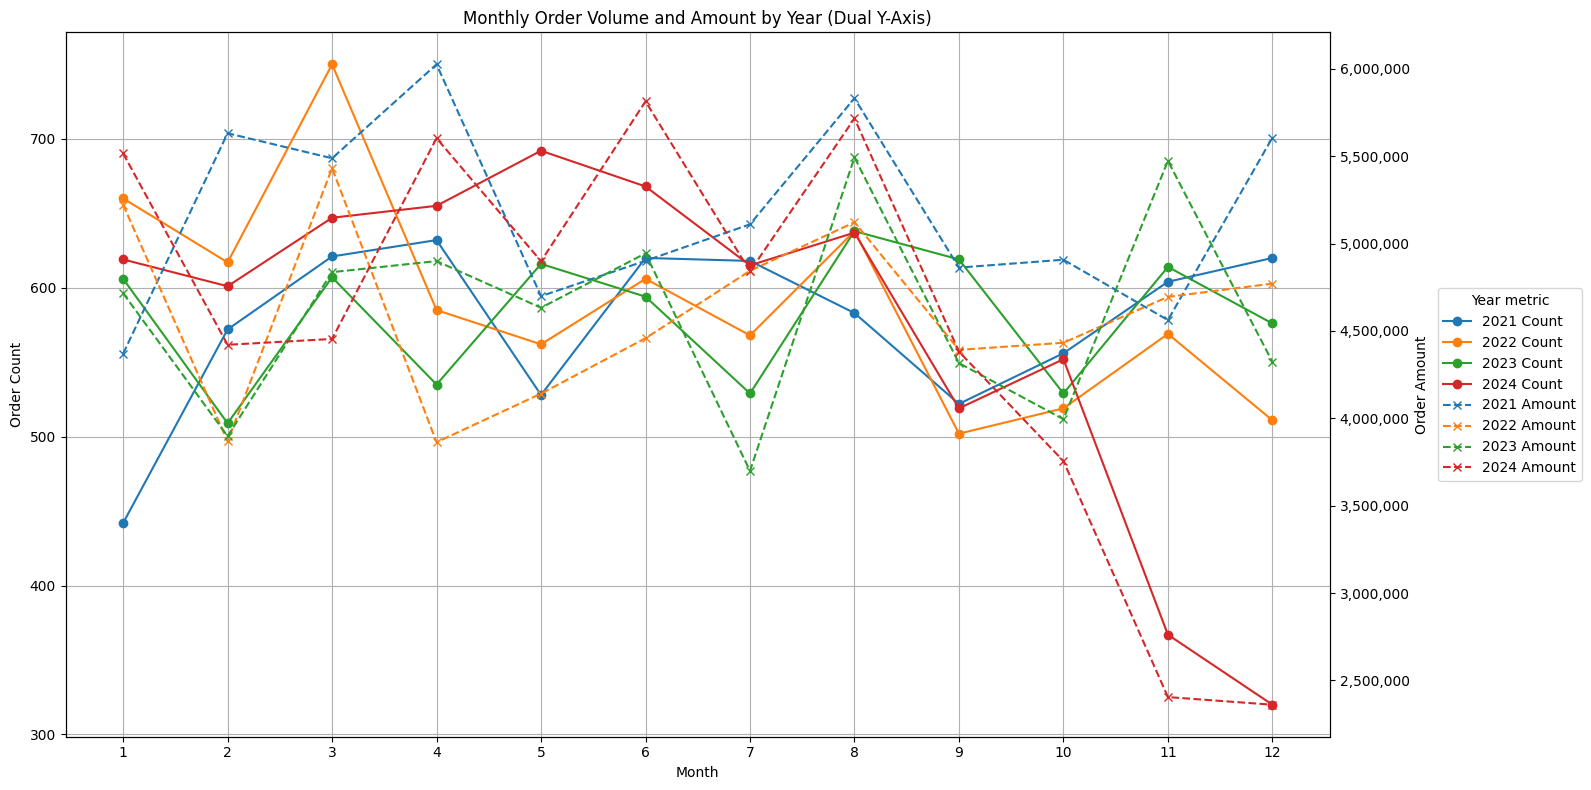

/home/shawn/pd_project/src/eda.py:746: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fulfill_count = df_pivot.groupby("fulfill_bin").size().reset_index(name="OrderCount")


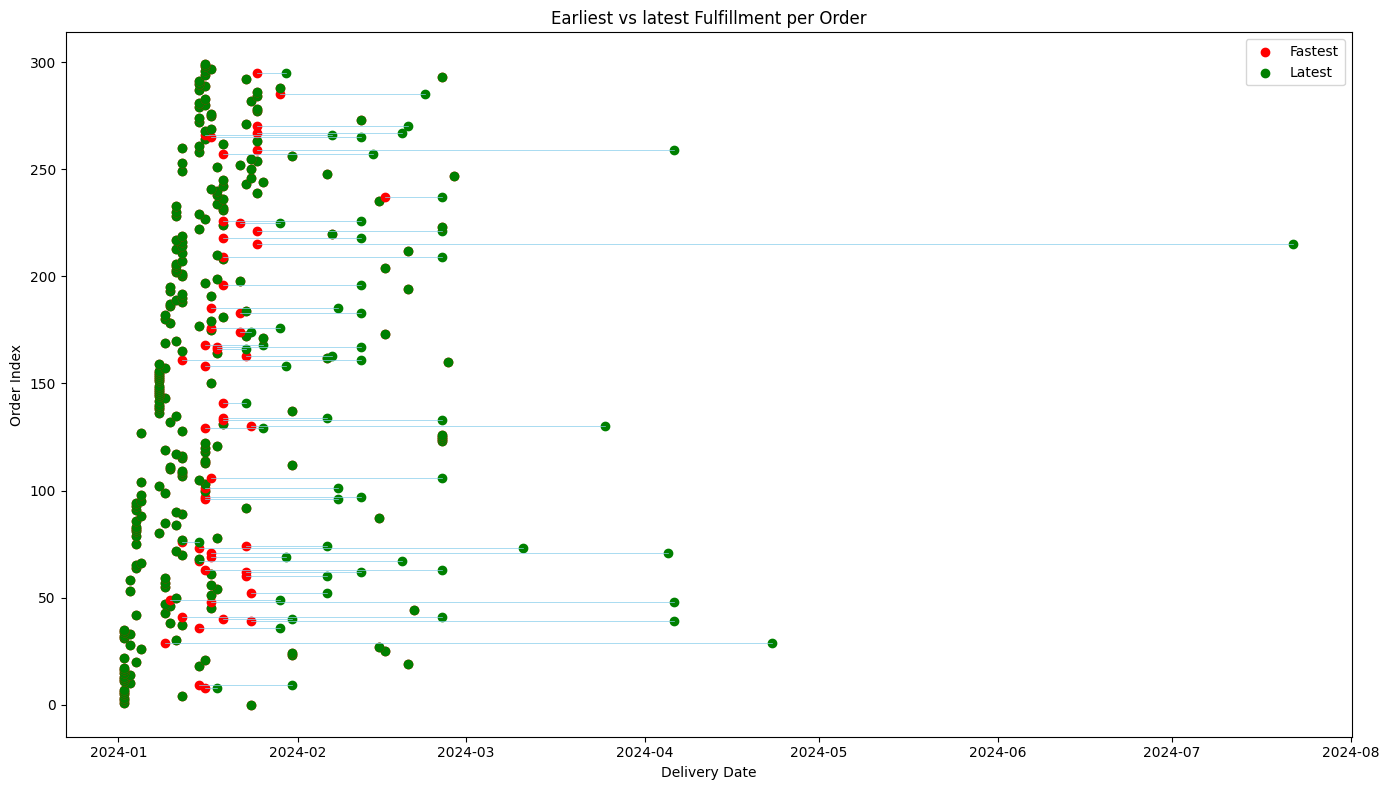

In [1]:
import sys
import os

# 设置项目根目录为当前 notebook 所在路径的上一级目录
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.data_load import load_ocrd, load_ordr, load_rdr1, load_odln
from src.eda import plot_customer_count_by_country,plot_customer_sort_by_revenue,calculate_brand_revenue_percent, plot_item_sort_revenue, calculate_item_revenue_percent,plot_sort_order_by_month, plot_fulfill_duration,plot_cusomter_revenue_persent
import pandas as pd
pd.set_option('display.max_rows', None)        # 显示所有行
pd.set_option('display.max_columns', None)     # 显示所有列（避免 ...）
pd.set_option('display.max_colwidth', None)    # 显示完整文本内容
pd.set_option('display.width', 0)              # 自适应终端宽度
pd.options.display.float_format = '{:,.2f}'.format

df_load_ocrd = load_ocrd()
df_load_ordr = load_ordr()
df_load_rdr1 = load_rdr1()
df_load_odln = load_odln()

plot_sort_order_by_month(df_load_ordr)


df_load_rdr1 = df_load_rdr1.rename(columns={"DocEntry": "RDR1_DocEntry"})
df_load_odln = df_load_odln.rename(columns={"DocEntry": "ODLN_DocEntry"})

df_merged_odln  = pd.merge(
    df_load_rdr1, 
    df_load_odln, 
    left_on="TrgetEntry",
    right_on="ODLN_DocEntry",
    how="left"
    )

df_merged_oldn_orod = pd.merge(
    df_merged_odln,
    df_load_ordr,
    left_on="RDR1_DocEntry",
    right_on="DocEntry",
    how="inner")

df_merged_oldn_orod = df_merged_oldn_orod.rename(columns={"DocEntry": "RDR1_DocEntry"})
df_merged_oldn_orod = df_merged_oldn_orod.rename(columns={"DocEntry": "RDR1_DocEntry"})
df_merged_oldn_orod = df_merged_oldn_orod.rename(columns={"DocDate_y": "order_date"})
df_merged_oldn_orod = df_merged_oldn_orod.rename(columns={"DocDate_x": "delivery_date"})


plot_fulfill_duration(df_merged_oldn_orod)


